In [2]:
import urllib
import arxiv
import requests
import json
import csv
import pandas as pd
from collections import Counter, defaultdict
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 
import datetime

In [3]:
search = arxiv.Search(
  query = "graphene",
  max_results = 10,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

for result in search.results():
  print(result.title)

/tmp/ipykernel_16228/3772056595.py:7: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


Ferroelectric switching control of spin current in graphene proximitized by In$_2$Se$_3$
An Atomic Cluster Expansion Potential for Twisted Multilayer Graphene
Graphene Nanoribbons as a Majorana Platform
Recent solution to the Casimir puzzle awaits its experimental confirmation
Non-Hermitian topological electric circuits with projective symmetry
Hetero-Orbital Two-Component Fractional Quantum Hall States in Bilayer Graphene
Movable Dirac Points with Ferroelectrics: Kink States and Berry Curvature Dipoles
Observing the Birth of Rydberg Exciton Fermi Polarons on a Moire Fermi Sea
Exciton condensation of composite fermions in double layer quantum Hall systems
Half-integer thermal conductance in the absence of Majorana mode


In [10]:
import arxiv

client = arxiv.Client(page_size=100, delay_seconds=3, num_retries=3)

search = arxiv.Search(
    query='"quantum dots"',
    sort_by=arxiv.SortCriterion.Relevance,
    sort_order=arxiv.SortOrder.Descending,
)

results = []
max_results_to_fetch = 1000  # ile maksymalnie chcesz pobrać

for i, paper in enumerate(client.results(search)):
    results.append(paper)
    if i + 1 >= max_results_to_fetch:
        break

print(f"Pobrano {len(results)} wyników.")


Pobrano 1000 wyników.


In [11]:
qd_df = pd.DataFrame([vars(paper) for paper in quantum_dots])

In [12]:
qd_df.head(10)

,entry_id,updated,published,title,authors,summary,comment,journal_ref,doi,primary_category,categories,links,pdf_url,_raw
0,http://arxiv.org/abs/cond-mat/0310363v1,2003-10-15 20:15:59+00:00,2003-10-15 20:15:59+00:00,Excitonic properties of strained wurtzite and ...,"[Vladimir A. Fonoberov, Alexander A. Balandin]",We investigate exciton states theoretically in...,"18 pages, accepted for publication in the Jour...","J. Appl. Phys. 94, 7178 (2003)",10.1063/1.1623330,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1063/1.1623330, http://a...",http://arxiv.org/pdf/cond-mat/0310363v1,{'id': 'http://arxiv.org/abs/cond-mat/0310363v...
1,http://arxiv.org/abs/2008.11666v1,2020-08-26 16:48:21+00:00,2020-08-26 16:48:21+00:00,A two-dimensional array of single-hole quantum...,"[F. van Riggelen, N. W. Hendrickx, W. I. L. La...",Quantum dots fabricated using techniques and m...,"7 pages, 4 figures",None,10.1063/5.0037330,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1063/5.0037330, http://a...",http://arxiv.org/pdf/2008.11666v1,"{'id': 'http://arxiv.org/abs/2008.11666v1', 'g..."
2,http://arxiv.org/abs/cond-mat/0411742v1,2004-11-30 02:56:15+00:00,2004-11-30 02:56:15+00:00,Polar optical phonons in wurtzite spheroidal q...,"[Vladimir A. Fonoberov, Alexander A. Balandin]",Polar optical-phonon modes are derived analyti...,11 pages,"J. Phys.: Condens. Matter 17, 1085 (2005)",10.1088/0953-8984/17/7/003,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://dx.doi.org/10.1088/0953-8984/17/7/003,...",http://arxiv.org/pdf/cond-mat/0411742v1,{'id': 'http://arxiv.org/abs/cond-mat/0411742v...
3,http://arxiv.org/abs/1403.4790v1,2014-03-19 13:03:49+00:00,2014-03-19 13:03:49+00:00,Group-velocity slowdown in quantum-dots and qu...,"[Stephan Michael, Weng W. Chow, Hans Christian...",We investigate theoretically the slowdown of o...,Physics and Simulation of Optoelectronic Devic...,None,10.1117/12.2042412,cond-mat.mes-hall,"[cond-mat.mes-hall, cond-mat.mtrl-sci]","[http://dx.doi.org/10.1117/12.2042412, http://...",http://arxiv.org/pdf/1403.4790v1,"{'id': 'http://arxiv.org/abs/1403.4790v1', 'gu..."
4,http://arxiv.org/abs/cond-mat/0403328v1,2004-03-12 18:28:06+00:00,2004-03-12 18:28:06+00:00,A new method to epitaxially grow long-range or...,"[J. Bauer, D. Schuh, E. Uccelli, R. Schulz, A....",We report on a new approach for positioning of...,None,None,None,cond-mat.mes-hall,[cond-mat.mes-hall],"[http://arxiv.org/abs/cond-mat/0403328v1, http...",http://arxiv.org/pdf/cond-mat/0403328v1,{'id': 'http://arxiv.org/abs/cond-mat/0403328v...
5,http://arxiv.org/abs/cond-mat/0411484v1,2004-11-18 16:47:14+00:00,2004-11-18 16:47:14+00:00,Giant optical anisotropy in a single InAs quan...,"[I. Favero, Guillaume Cassabois, A. Jankovic, ...",We present the experimental evidence of giant ...,submitted to Applied Physics Letters,None,10.1063/1.1854733,cond-mat.other,[cond-mat.other],"[http://dx.doi.org/10.1063/1.1854733, http://a...",http://arxiv.org/pdf/cond-mat/0411484v1,{'id': 'http://arxiv.org/abs/cond-mat/0411484v...
6,http://arxiv.org/abs/1003.2350v1,2010-03-11 15:52:09+00:00,2010-03-11 15:52:09+00:00,Linewidth broadening of a quantum dot coupled ...,"[Arka Majumdar, Andrei Faraon, Erik Kim, Dirk ...",We study the coupling between a photonic cryst...,"5 pages, 4 figures",None,10.1103/PhysRevB.82.045306,quant-ph,[quant-ph],"[http://dx.doi.org/10.1103/PhysRevB.82.045306,...",http://arxiv.org/pdf/1003.2350v1,"{'id': 'http://arxiv.org/abs/1003.2350v1', 'gu..."
7,http://arxiv.org/abs/1201.1258v1,2012-01-05 18:56:21+00:00,2012-01-05 18:56:21+00:00,Photoluminescence from In0.5Ga0.5As/GaP quantu...,"[Kelley Rivoire, Sonia Buckley, Yuncheng Song,...",We demonstrate room temperature visible wavele...,None,None,10.1103/PhysRevB.85.045319,quant-ph,"[quant-ph, physics.optics]","[http://dx.doi.org/10.1103/PhysRevB.85.045319,...",http://arxiv.org/pdf/1201.1258v1,"{'id': 'http://arxiv.org/abs/1201.1258v1', 'gu..."
8,http://arxiv.org/abs/1206.2674v1,2012-06-12 21:00:22+00:00

In [13]:
list(qd_df)

['entry_id',
 'updated',
 'published',
 'title',
 'authors',
 'summary',
 'comment',
 'journal_ref',
 'doi',
 'primary_category',
 'categories',
 'links',
 'pdf_url',
 '_raw']

In [14]:
# Add a first_author column: the name of the first author among each paper's list of authors.
qd_df['first_author'] = [authors_list[0].name for authors_list in qd_df['authors']]
# Keep a reference to the original results in the dataframe: this is useful for downloading PDFs.
qd_df['_result'] = quantum_dots

# Narrow our dataframe to just the columns we want for our analysis.
qd_df = qd_df[['title', 'published', 'first_author', '_result']]
qd_df

,title,published,first_author,_result
0,Excitonic properties of strained wurtzite and ...,2003-10-15 20:15:59+00:00,Vladimir A. Fonoberov,http://arxiv.org/abs/cond-mat/0310363v1
1,A two-dimensional array of single-hole quantum...,2020-08-26 16:48:21+00:00,F. van Riggelen,http://arxiv.org/abs/2008.11666v1
2,Polar optical phonons in wurtzite spheroidal q...,2004-11-30 02:56:15+00:00,Vladimir A. Fonoberov,http://arxiv.org/abs/cond-mat/0411742v1
3,Group-velocity slowdown in quantum-dots and qu...,2014-03-19 13:03:49+00:00,Stephan Michael,http://arxiv.org/abs/1403.4790v1
4,A new method to epitaxially grow long-range or...,2004-03-12 18:28:06+00:00,J. Bauer,http://arxiv.org/abs/cond-mat/0403328v1
...,...,...,...,...
5995,Thermoelectric efficiency at maximum power in ...,2010-10-07 09:11:46+00:00,Natthapon Nakpathomkun,http://arxiv.org/abs/1010.1375v1
5996,Transport through a quantum dot with excitonic...,2010-10-11 22:05:15+00:00,Florian Elste,http://arxiv.org/abs/1010.2251v1
5997,Atomistic pseudopotential calculations of the ...,2010-10-12 01:20:39+00:00,Ming Gong,http://arxiv.org/abs/1010.2276v1
5998,Designer switches: Effect of crystal planes on...,2010-10-13 11:20:32+00:00,Ali Goker,http://arxiv.org/abs/1010.2631v1


<Axes: xlabel='published'>

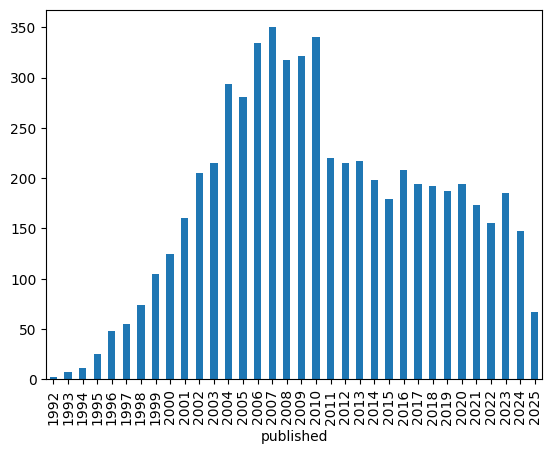

In [15]:
qd_df["published"].groupby(qd_df["published"].dt.year).count().plot(kind="bar")

In [16]:
qd_authors = qd_df.groupby(qd_df["first_author"])["first_author"].count().sort_values(ascending=False)
qd_authors.head(20)

first_author
Y. Alhassid               18
Bing Dong                 17
Ulrich Hohenester         14
Kicheon Kang              13
Xuedong Hu                11
Constantine Yannouleas    11
Ramin M. Abolfath         10
G. Giavaras               10
P. W. Brouwer             10
B. Szafran                10
Arka Majumdar              9
Björn Sothmann             9
V. N. Mantsevich           9
J. Fransson                9
Massimo Rontani            9
P. G. Silvestrov           9
Peter Stano                8
Qing-feng Sun              8
Ireneusz Weymann           8
S. Gustavsson              8
Name: first_author, dtype: int64

In [17]:
qd_Trocha_sorted  = qd_df[qd_df['first_author']=='Piotr Trocha'].sort_values('published')
qd_Trocha_sorted

,title,published,first_author,_result
828,Dicke-like effect in spin-polarized transport ...,2007-11-22 16:11:11+00:00,Piotr Trocha,http://arxiv.org/abs/0711.3611v2
2535,Kondo-Dicke resonances in electronic transport...,2008-03-28 15:49:07+00:00,Piotr Trocha,http://arxiv.org/abs/0803.4154v1
3679,Negative tunnel magnetoresistance and differen...,2009-11-02 11:45:03+00:00,Piotr Trocha,http://arxiv.org/abs/0911.0291v1
5928,Beating in electronic transport through quantu...,2010-04-11 16:20:04+00:00,Piotr Trocha,http://arxiv.org/abs/1004.1819v2
2675,Orbital Kondo effect in double quantum dots,2010-08-17 14:13:23+00:00,Piotr Trocha,http://arxiv.org/abs/1008.2902v2
2723,The influence of spin-flip scattering on the p...,2011-05-08 20:12:41+00:00,Piotr Trocha,http://arxiv.org/abs/1105.1550v1
2858,Spin-polarized Andreev transport influenced by...,2014-09-14 23:54:35+00:00,Piotr Trocha,http://arxiv.org/abs/1409.4122v1
1774,Spin-polarized transport in quadruple quantum ...,2024-09-28 19:51:25+00:00,Piotr Trocha,http://arxiv.org/abs/2409.19444v2
